In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [74]:
# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\python dataset and complete project\House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [75]:
#Exploratory Data Analysis (EDA)
print("\n--Data Info")
print(df.info())


--Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


In [76]:
print("Duplicate Rows:", df.duplicated().sum())  

Duplicate Rows: 0


In [77]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [78]:
print("\n --Missing values")
print(df.isnull().sum())


 --Missing values
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [79]:
print("\n --Descriptive Statistics")
print(df.describe())


 --Descriptive Statistics
               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000


In [80]:
print("Mean House Rent:", round(df["Rent"].mean()))
print("Median House Rent:", round(df["Rent"].median()))
print("Highest House Rent:", round(df["Rent"].max()))
print("Lowest House Rent:", round(df["Rent"].min()))

Mean House Rent: 34993
Median House Rent: 16000
Highest House Rent: 3500000
Lowest House Rent: 1200


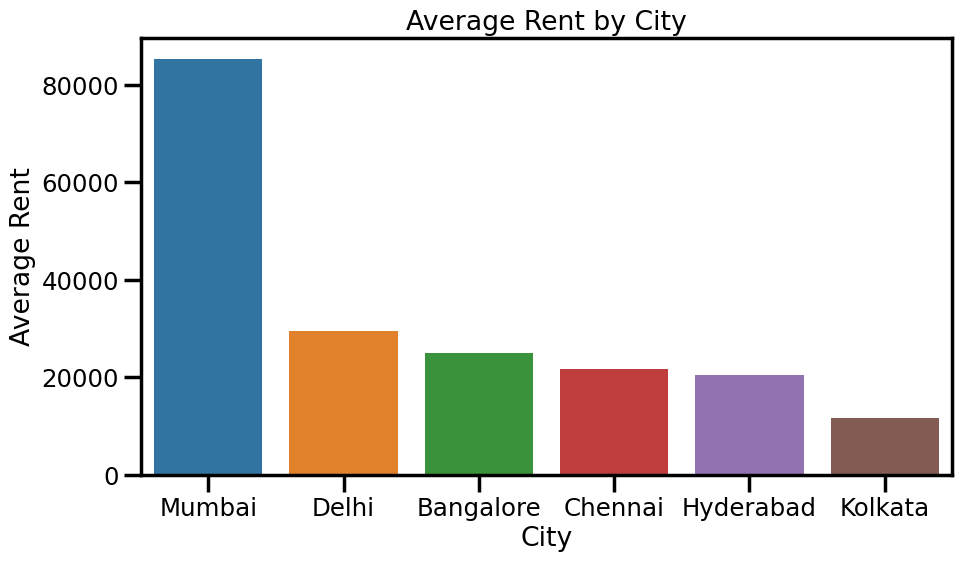

In [81]:
# Objective 1--- Rent Distribution Across Cities
plt.figure(figsize=(10, 6))
avg_rent = df.groupby('City')['Rent'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rent.index, y=avg_rent.values, hue=avg_rent.index, legend=False)
plt.title('Average Rent by City')
plt.ylabel('Average Rent')
plt.tight_layout()
plt.show()


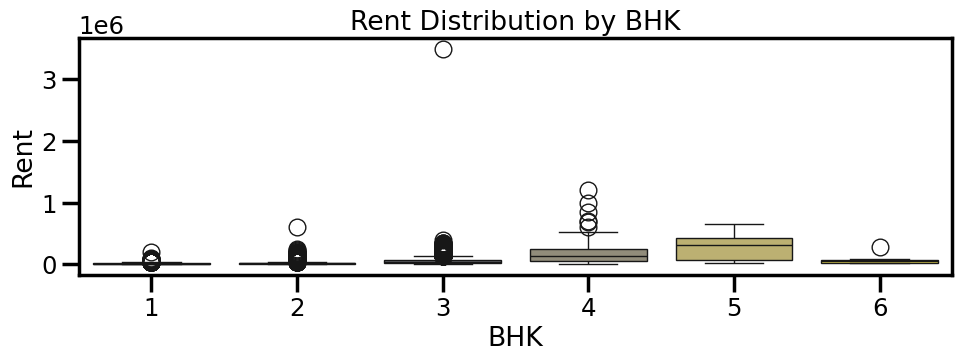

In [82]:
# Objective 2-- Relationship Between BHK and Rent
plt.figure(figsize=(10, 4))
sns.boxplot(x='BHK', y='Rent', data=df, hue='BHK', palette='cividis',legend=False)
plt.title('Rent Distribution by BHK')
plt.tight_layout()
plt.show()

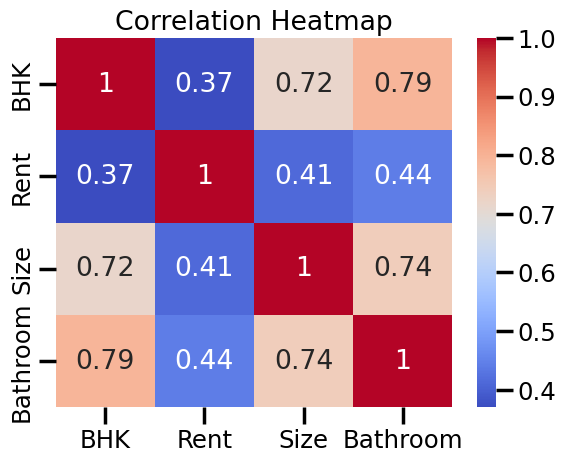

In [83]:
# Objective 3--Rental Price Analysis
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


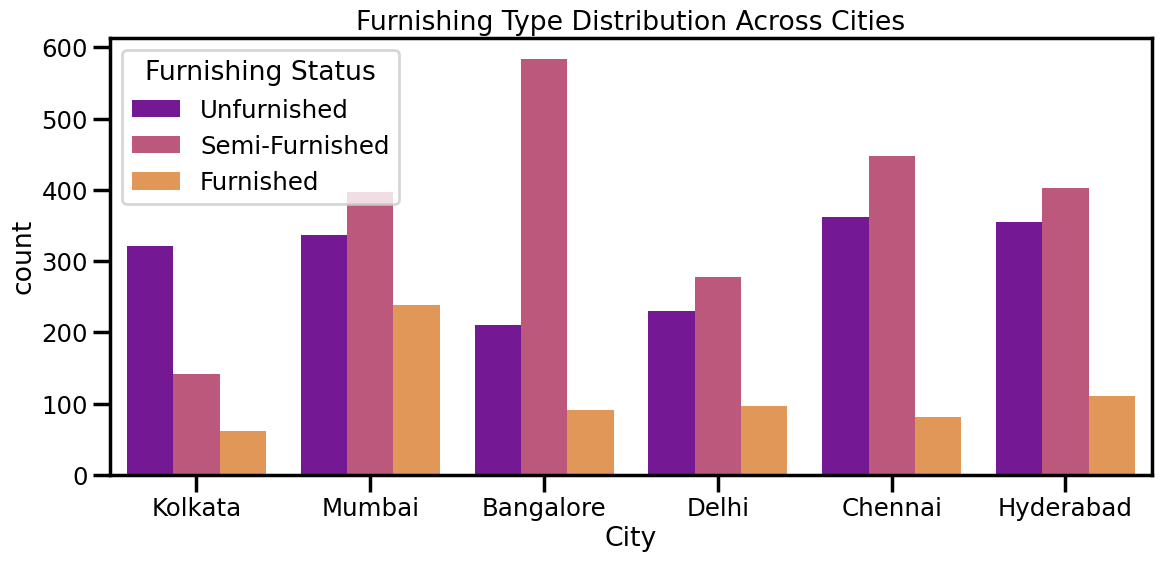

In [84]:
#Objective 4-- Count of Furnishing Types by City
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='City', hue='Furnishing Status', palette='plasma')
plt.title('Furnishing Type Distribution Across Cities')
plt.tight_layout()
plt.show() 

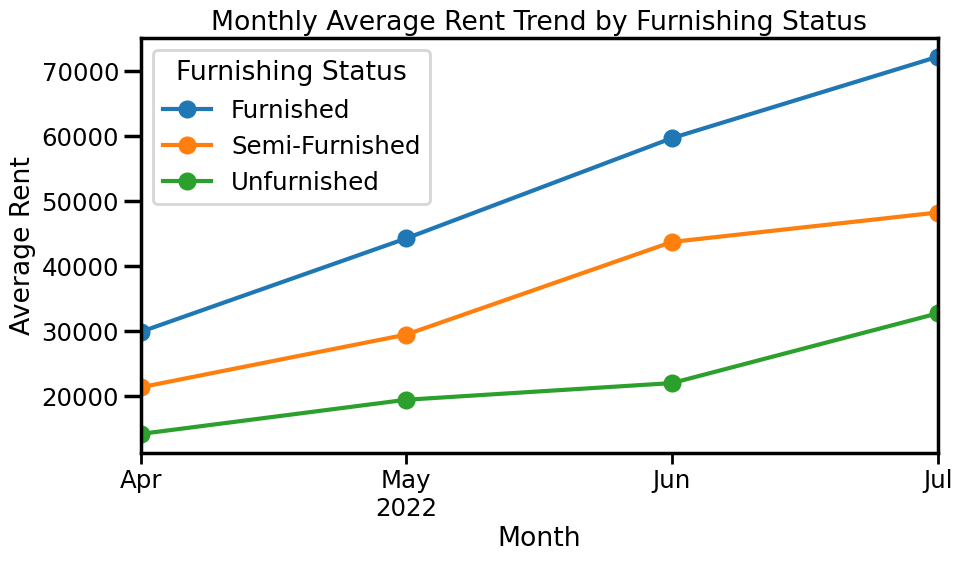

In [85]:
# Objective 5-- Monthly Average rent trend by furnishing status
df['Posted On'] = pd.to_datetime(df['Posted On'], errors='coerce', dayfirst=True)
df['Month'] = df['Posted On'].dt.to_period('M')
monthly_rent_furnishing = df.groupby(['Month', 'Furnishing Status'])['Rent'].mean().unstack()

monthly_rent_furnishing.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Average Rent Trend by Furnishing Status')
plt.ylabel('Average Rent')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Furnishing Status')
plt.show()


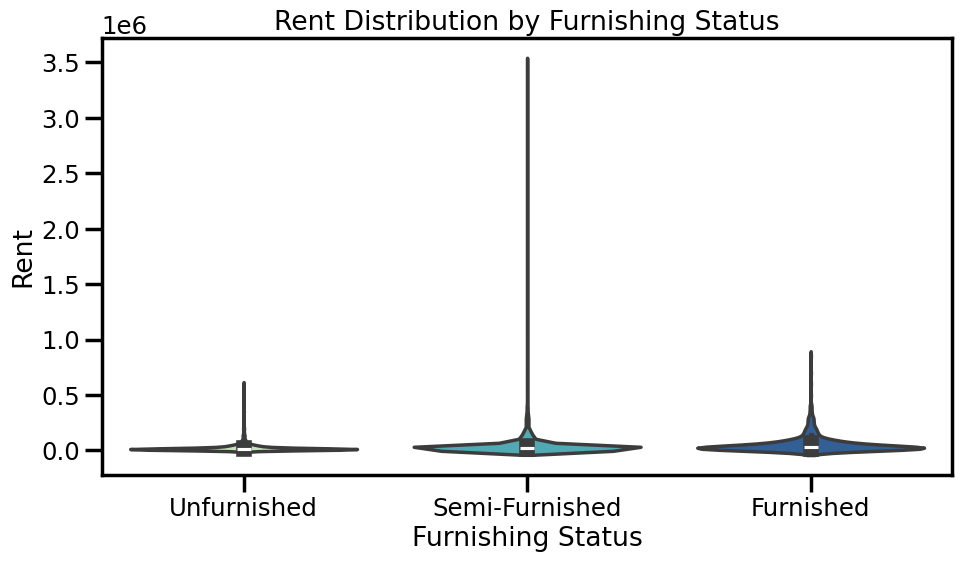

In [86]:
#Objective 6-- Furnishing and  Preference Insights
# Calculating the average rent by Furnishing Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Furnishing Status', y='Rent', data=df, hue='Furnishing Status', palette='YlGnBu', legend=False)
plt.title('Rent Distribution by Furnishing Status')
plt.tight_layout()
plt.show()


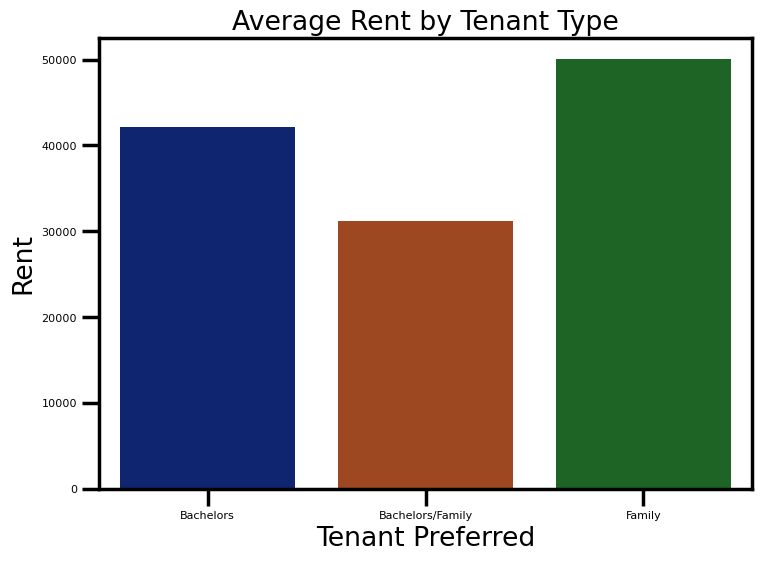

In [131]:
# Calculating the average rent by Tenant Preferred
avg_rent_by_tenant = df.groupby('Tenant Preferred')['Rent'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Tenant Preferred', y='Rent', data=avg_rent_by_tenant, hue='Tenant Preferred', palette='dark', legend=False)
plt.title('Average Rent by Tenant Type')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

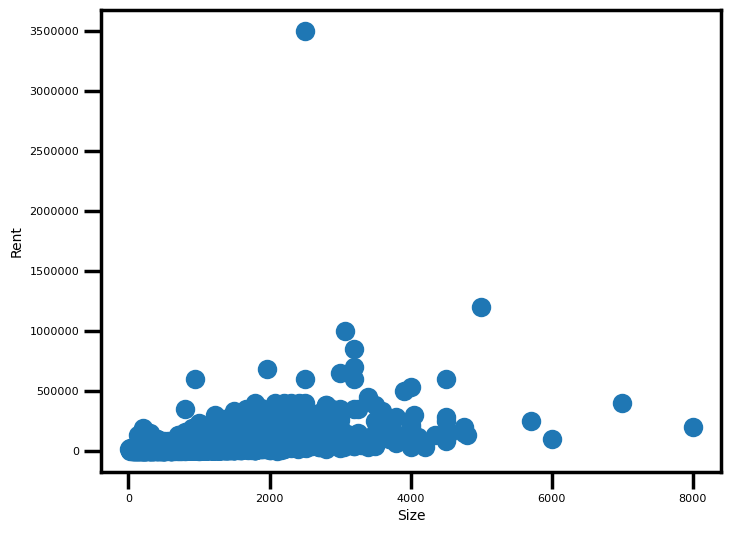

In [127]:
#Objective 7-- Scatter Plot on House Rents vs House Sizes
plt.figure(figsize=(8, 6))
plt.ticklabel_format(style='plain')
plt.scatter(df["Size"], df["Rent"])
plt.xlabel("Size", fontsize=10)
plt.ylabel("Rent", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

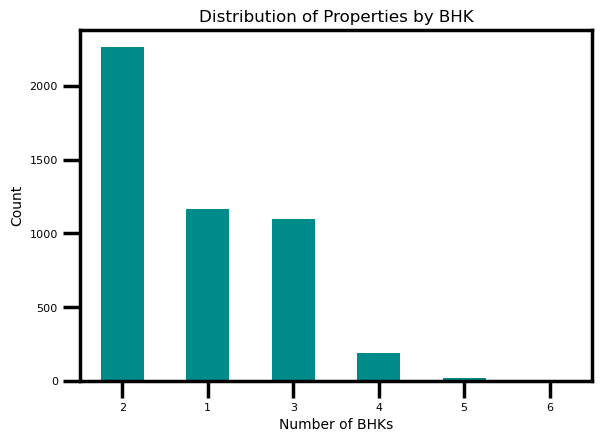

In [59]:
#Objective 8--Distribution of different number of BHK 
ax = df["BHK"].value_counts().plot(kind='bar', color='darkcyan', rot=0)
ax.set_title("Distribution of Properties by BHK", fontsize=12)
ax.set_xlabel("Number of BHKs", fontsize=10)
ax.set_ylabel("Count", fontsize=10)
ax.tick_params(axis='both', labelsize=8)
plt.tight_layout()
plt.show()